<h1 style="color:rgb(0,120,170)">Assignment 3: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1 (20 points):</h3>

########## YOUR SOLUTION HERE ##########

Definition:
A matrix C is positive semi-definite if $\forall \vec{a} \neq 0 $ , $\vec{a}^T C \vec{a} \geq 0$

$$\vec{a}^T C \vec{a} = \left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle = \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$$
$$\sum_{s,t=1}^m a_s a_t c_{st} = \sum_{s,t=1}^m a_s a_t \frac1n \sum_{i=1}^n x_{is} x_{it} = \frac1n \sum_{s,t=1}^m a_s a_t \sum_{i=1}^n x_{is} x_{it} = \frac1n \sum_{i=1}^n \sum_{s,t=1}^m a_s a_t x_{is} x_{it} = \frac1n \sum_{i=1}^n \Big(\sum_{s=1}^m a_s x_{is}\Big) \Big(\sum_{t=1}^m a_t x_{it}\Big) = $$
$$ = \frac1n \sum_{i=1}^n \Big(\sum_{s=1}^m a_s x_{is}\Big)^2 \geq 0 $$

$\forall n \in \mathbb{N}$, $\frac{1}{n} > 0$ and $\forall x_i_s$ and $\forall a_s$, $\Big(\sum_{s=1}^m a_s x_{is}\Big)^2 \geq 0$. Therefore:

$$\vec{a}^T C \vec{a} = \left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle = \frac1n \sum_{i=1}^n \Big(\sum_{s=1}^m a_s x_{is}\Big)^2 \geq 0$$


<br><br>
Alternative, using matrix and vector multiplication:

$$\vec{a}^T C \vec{a} = \vec{a}^T \Big(\frac{1}{n} \mathbf{X}^T\mathbf{X}\Big) \vec{a} \geq 0$$
$$\vec{a}^T \Big(\frac{1}{n} \mathbf{X}^T\mathbf{X}\Big) \vec{a} = \frac{1}{n} \vec{a}^T \mathbf{X}^T\mathbf{X} \vec{a} = \frac{1}{n} (\mathbf{X} \vec{a})^T \mathbf{X} \vec{a} =  \frac{1}{n} (\mathbf{X} \vec{a})^2 $$

$\forall n \in \mathbb{N}$, $\frac{1}{n} > 0$ and $\forall \mathbf{X}$ and $\forall \vec{a}$, $(\mathbf{X} \vec{a})^2 \geq 0$. Therefore:
$$\vec{a}^T C \vec{a} = \frac{1}{n} (\mathbf{X} \vec{a})^2 \geq 0$$
Hence, the matrix C is positive semi-definite


Definition:
Let $\mathbf{A}$ be a matrix. If there is a vector $\vec{v} \in \mathbb{R}^n \neq 0$ such that $\mathbf{A}\vec{v}=\lambda\vec{v}$, than $\lambda$ is called an eigenvalue of $\mathbf{A}$ and $\vec{v}$ is the corresponding eigenvector.

$$\mathbf{A}\vec{v}=\lambda\vec{v}$$

If $\vec{v}$ is an eigenvector of $\mathbf{A}$ than:

$$\vec{v}^T\mathbf{A}\vec{v}=\vec{v}^T\lambda\vec{v} = \lambda \vec{v}^T \vec{v} = \lambda (\vec{v})^2$$
$$\vec{v}^T\mathbf{A}\vec{v} = \lambda (\vec{v})^2$$

$\vec{v}^T\mathbf{A}\vec{v} \geq 0$ per definition, and $\forall \vec{v}, (\vec{v})^2 \geq 0$. Therefore:

If $(\vec{v})^2 \geq 0$, than $\lambda$ should be > 0.



The eigenvalues should be ranked from bigger to smaller by ist magnitude, this has only a logical reason if all of them are non negative. They are also important to calculate the explained variance. A negative value in any of them would chagnge this values.

<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [2]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

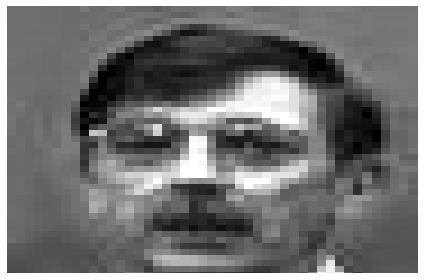

In [84]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [164]:
########## YOUR SOLUTION HERE ##########
covmat = np.cov(data.T)
eigenvalues, eigenvectors = np.linalg.eig(covmat)

explained_variance = []

exp_50 = []
exp_75 = []
exp_99 = []

sum_eig = sum(eigenvalues)

for i in eigenvalues:
    explained_variance.append(i/sum_eig)
    sum_ = sum(explained_variance)

    if sum_ > 0.5:
        if len(exp_50) == 0:
            exp_50 = explained_variance.copy()
    if sum_ > 0.75:
        if len(exp_75) == 0:
            exp_75 = explained_variance.copy()
    if sum_ > 0.99:
        if len(exp_99) == 0:
            exp_99 = explained_variance.copy()

print(f'Number of components to explain 50% of the variance: {len(exp_50)}')
print(f'Explained variance: {sum(exp_50)}')
print(f'Number of components to explain 75% of the variance: {len(exp_75)}')
print(f'Explained variance: {sum(exp_75)}')
print(f'Number of components to explain 99% of the variance: {len(exp_99)}')
print(f'Explained variance: {sum(exp_99)}')

data_50 = data.copy()
pca_50 = PCA(n_components=len(exp_50))
Y_50 = pca_50.fit_transform(data_50)

data_75 = data.copy()
pca_75 = PCA(n_components=len(exp_75))
Y_75 = pca_75.fit_transform(data_75)

data_99 = data.copy()
pca_99 = PCA(n_components=len(exp_99))
Y_99 = pca_99.fit_transform(data_99)

Number of components to explain 50% of the variance: 4
Explained variance: 0.5141740887481957
Number of components to explain 75% of the variance: 18
Explained variance: 0.7562183511176117
Number of components to explain 99% of the variance: 367
Explained variance: 0.9900368370506842


<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct.

Recall PCA: We start with a matrix $\underset{n \times l}{\mathrm{X}}$, calculate the eigenvectors matrix $\underset{l \times n}{\mathrm{V}}$ and calculate PCA over k components to compute the matrix $\underset{n \times k}{\mathrm{Y}}$.<br><br>
We need to perform the reconstruction of the original matrix $\underset{n \times l}{\mathrm{X}}$, starting with the matrix $\underset{n \times k}{\mathrm{Y}}$. $\underset{k \times l}{\mathrm{W}}$ is the transformation matrix, formed with the first k eigenvectors.<br><br>

$
W =
\begin{pmatrix}
    \vert & & \vert \\
    \vec{v_1} & \hdots & \vec{v_k}   \\
    \vert & & \vert
\end{pmatrix}$

To perform the reconstruction, we have to compute the following operation:

$$ \underset{n \times l}{\mathrm{X}} = \underset{n \times k}{\mathrm{Y}} \underset{k \times l}{\mathrm{W}^T} $$

$$
\underset{n \times l}{\mathrm{X}} =
\underset{n \times k}\begin{pmatrix}
    \text{---} \hspace{-0.2cm} & \vec{y_1} & \hspace{-0.2cm} \text{---} \\
    \hspace{-0.2cm} & \vdots \\
    \text{---} \hspace{-0.2cm} & \vec{y_n} & \hspace{-0.2cm} \text{---}
\end{pmatrix}

\underset{k \times l}\begin{pmatrix}
    \text{---} \hspace{-0.2cm} & \vec{v_1} & \hspace{-0.2cm} \text{---} \\
    \hspace{-0.2cm} & \vdots \\
    \text{---} \hspace{-0.2cm} & \vec{v_k} & \hspace{-0.2cm} \text{---}
\end{pmatrix}

=

\underset{n \times l}\begin{pmatrix}
    \vec{y_1} \vec{(v_1_1,v_2_1 \hdots v_1_k)} & \hdots & \vec{y_1} \vec{(v_1_l,v_2_l \hdots v_k_l)} \\
    \vdots & \ddots & \vdots \\
    \vec{y_n} \vec{(v_1_1,v_2_1 \hdots v_1_k)} & \hdots & \vec{y_n} \vec{(v_1_l,v_2_l \hdots v_k_l)}
\end{pmatrix}
$$

We have to take on account that this result matrix $\mathrm{X}$ is standardized. To obtain the original matrix we have to multiply $\mathrm{X}$ by the $\vec{\sigma}$ of the original matrix and substract the $\vec{\mu}$ of the original matrix.

In [165]:
########## YOUR SOLUTION HERE ##########

def decompress_PCA(pca, data):
    return pca.inverse_transform(data)

reconstruct_50 = decompress_PCA(pca_50, Y_50)
reconstruct_75 = decompress_PCA(pca_75, Y_75)
reconstruct_99 = decompress_PCA(pca_99, Y_99)

<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

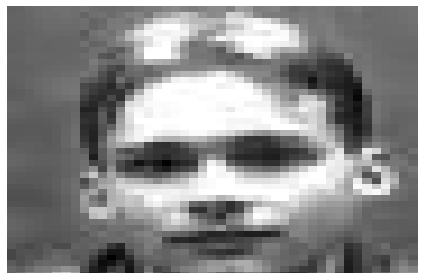

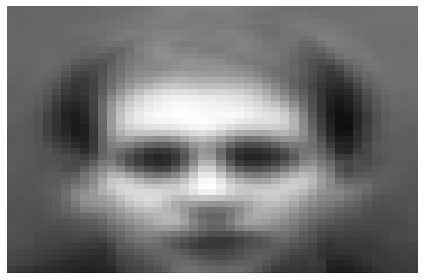

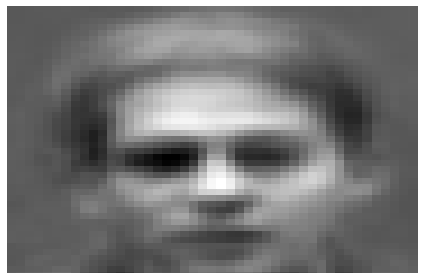

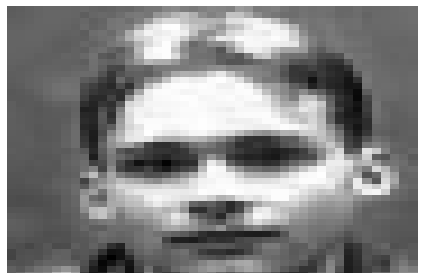

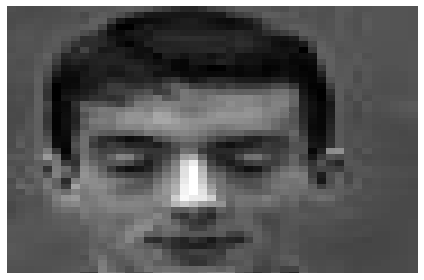

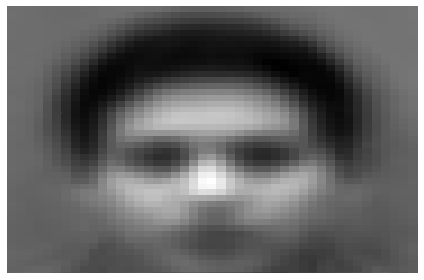

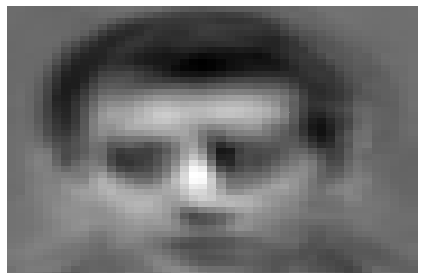

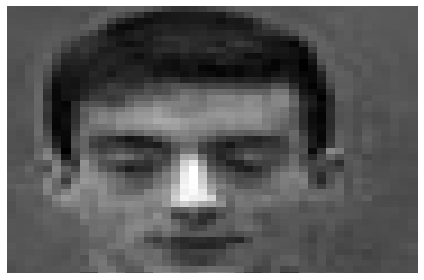

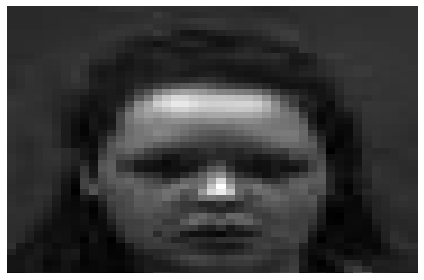

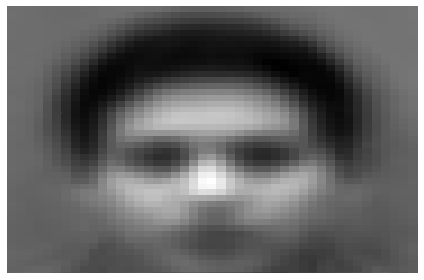

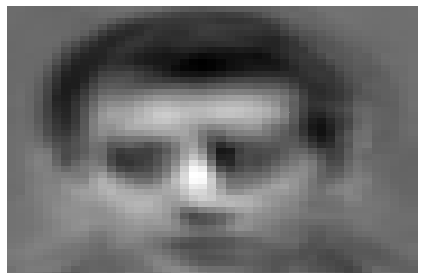

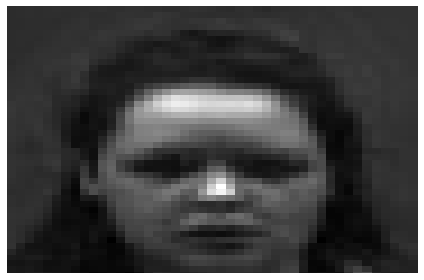

In [166]:
########## YOUR SOLUTION HERE ##########
plotImg(data[120, :])
plotImg(reconstruct_50[120, :])
plotImg(reconstruct_75[120, :])
plotImg(reconstruct_99[120, :])

plotImg(data[1220, :])
plotImg(reconstruct_50[1220, :])
plotImg(reconstruct_75[1220, :])
plotImg(reconstruct_99[1220, :])

plotImg(data[2220, :])
plotImg(reconstruct_50[1220, :])
plotImg(reconstruct_75[1220, :])
plotImg(reconstruct_99[2220, :])

<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

########## YOUR SOLUTION HERE ##########

When we use a smaller percent rate of the variance, the reconstructed image is blurer, with less details. We can say is more (standard) is like a mix between all the images in the set. When we increase the rate, more details appear, till we have an exact copy of the image, if we use a 100% of rhe variance.

In [199]:
# Just for fun and better understanding of the process (Not a part of the exercise)
def decompress_PCA_own(eigenvectors, data_, k):
    data_ =  data_ @ eigenvectors[:, range(k)].T
    return data_ * np.std(data, axis = 0) + np.mean(data, axis = 0)

reconstruct_50_own = decompress_PCA_own(eigenvectors, Y_50, 4)
reconstruct_75_own = decompress_PCA_own(eigenvectors, Y_75, 18)
reconstruct_99_own = decompress_PCA_own(eigenvectors, Y_99, 367)

reconstruct_50_own_2 = np.matmul(Y_50, pca_50.components_) + pca_50.mean_
reconstruct_75_own_2 = np.matmul(Y_75, pca_75.components_) + pca_75.mean_
reconstruct_99_own_2 = np.matmul(Y_75, pca_75.components_) + pca_75.mean_

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [24]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0)
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

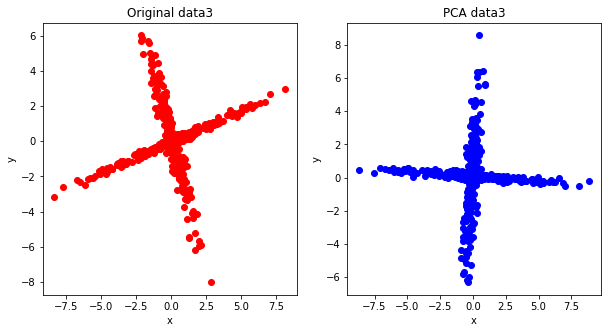

Using sklearn to compute
Explained Variance PC1: 0.5932170026500673
Explained Variance PC2: 0.4067829973499326

Using the definition of explained Variance
Explained Variance PC1: 0.5932170026500674
Explained Variance PC2: 0.4067829973499327


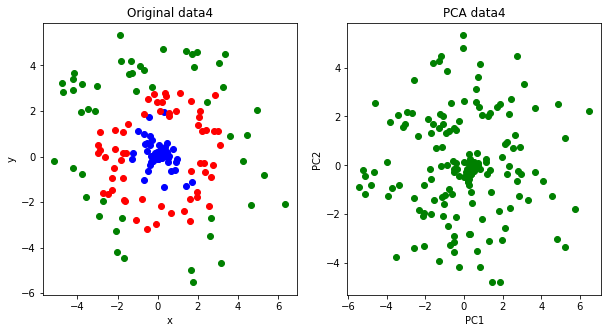

Using sklearn to compute
Explained Variance PC1: 0.544693580541503
Explained Variance PC2: 0.455306419458497

Using the definition of explained Variance
Explained Variance PC1: 0.544693580541503
Explained Variance PC2: 0.4553064194584971


In [51]:
########## YOUR SOLUTION HERE ##########

color = ['blue', 'red', 'green']

#Data 3
pca_data3 = PCA(n_components=2)
Y_data3 = pca_data3.fit_transform(data3)

fig = plt.figure(figsize=(10, 5))

# Original Data3 visualisation
plt.subplot(121)
plt.scatter(data3[:, 0], data3[:, 1], c='red')
plt.title('Original data3')
plt.xlabel('x')
plt.ylabel('y')

# Data3 after PCA visualisation
plt.subplot(122)
plt.scatter(Y_data3[:, 0], Y_data3[:, 1], c='blue')
plt.title('PCA data3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('Using sklearn to compute')
print(f'Explained Variance PC1: {pca_data3.explained_variance_ratio_[0]}')
print(f'Explained Variance PC2: {pca_data3.explained_variance_ratio_[1]}')
print('')
print('Using the definition of explained Variance')
covmat = np.cov(data3.T)
eigenvalues, eigenvectors = np.linalg.eig(covmat)

for i, value in enumerate(eigenvalues):
    print(f'Explained Variance PC{i+1}: {value / sum(eigenvalues)}')

#Data 4
pca_data4 = PCA(n_components=2)
Y_data4 = pca_data4.fit_transform(data4[:,0:2])

fig2 = plt.figure(figsize=(10, 5))

# Original Data4 visualisation

plt.subplot(121)

for c, i in enumerate(np.unique(data4[:,2])):
    x = data4[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])

plt.title('Original data4')
plt.xlabel('x')
plt.ylabel('y')

# Data4 after PCA visualisation

plt.subplot(122)

for c, i in enumerate(np.unique(data4[:,2])):
    x = Y_data4[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])

plt.title('PCA data4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print('Using sklearn to compute')
print(f'Explained Variance PC1: {pca_data4.explained_variance_ratio_[0]}')
print(f'Explained Variance PC2: {pca_data4.explained_variance_ratio_[1]}')
print('')
print('Using the definition of explained Variance')

covmat = np.cov(data4[:,0:2].T)
eigenvalues, eigenvectors = np.linalg.eig(covmat)

for i, value in enumerate(eigenvalues):
    print(f'Explained Variance PC{i+1}: {value / sum(eigenvalues)}')


<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

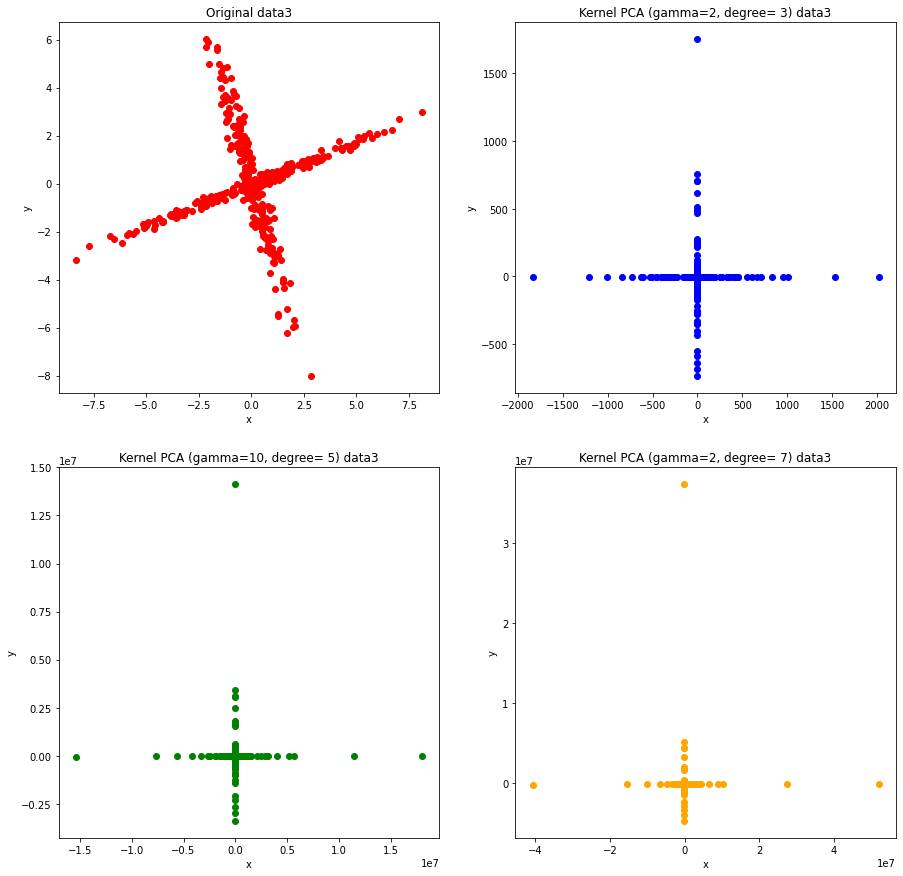

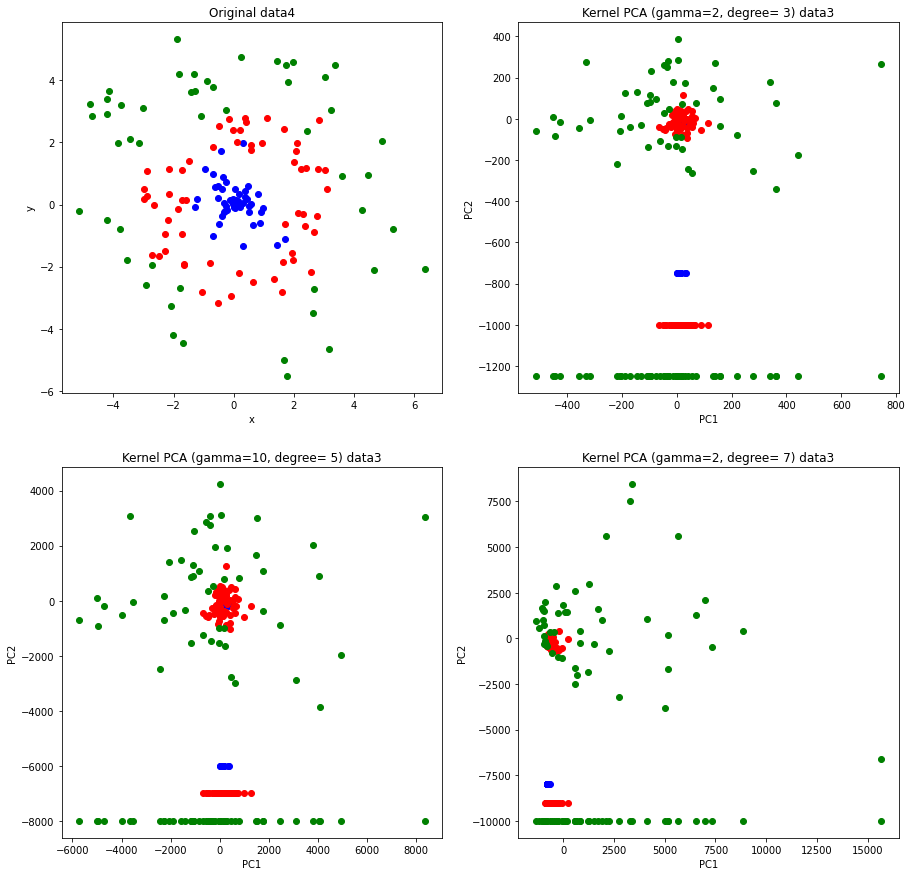

In [65]:
########## YOUR SOLUTION HERE ##########
#Kernel PCA using polynomial kernel

# Data3
kernel_pca_poly_3 = KernelPCA(kernel='poly', gamma=2, degree=3)
data_3_kernel_poly_3 = kernel_pca_poly_3.fit_transform(data3)

kernel_pca_poly_5 = KernelPCA(kernel='poly', gamma=10, degree=5)
data_3_kernel_poly_5 = kernel_pca_poly_5.fit_transform(data3)

kernel_pca_poly_7 = KernelPCA(kernel='poly', gamma=2, degree=7)
data_3_kernel_poly_7 = kernel_pca_poly_7.fit_transform(data3)


fig2 = plt.figure(figsize=(15, 15))
# Original Data3 visualisation
plt.subplot(221)
plt.scatter(data3[:, 0], data3[:, 1], c='red')
plt.title('Original data3')
plt.xlabel('x')
plt.ylabel('y')

# Data3 after Kernel PCA (Polynomial, gamma 2, degree 3) visualisation
plt.subplot(222)
plt.scatter(data_3_kernel_poly_3[:, 0], data_3_kernel_poly_3[:, 1], c='blue')
plt.title('Kernel PCA (gamma=2, degree= 3) data3')
plt.xlabel('x')
plt.ylabel('y')


# Data3 after Kernel PCA (Polynomial, gamma 10, degree 5) visualisation
plt.subplot(223)
plt.scatter(data_3_kernel_poly_5[:, 0], data_3_kernel_poly_5[:, 1], c='green')
plt.title('Kernel PCA (gamma=10, degree= 5) data3')
plt.xlabel('x')
plt.ylabel('y')


# Data3 after Kernel PCA (Polynomial, gamma 2, degree 7) visualisation
plt.subplot(224)
plt.scatter(data_3_kernel_poly_7[:, 0], data_3_kernel_poly_7[:, 1], c='orange')
plt.title('Kernel PCA (gamma=2, degree= 7) data3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Data4
kernel_pca_poly_3_2 = KernelPCA(kernel='poly', gamma=2, degree=3)
data_4_kernel_poly_3 = kernel_pca_poly_3_2.fit_transform(data4[:,0:2])

kernel_pca_poly_5_2 = KernelPCA(kernel='poly', gamma=10, degree=3)
data_4_kernel_poly_5 = kernel_pca_poly_5_2.fit_transform(data4[:,0:2])

kernel_pca_poly_7_2 = KernelPCA(kernel='poly', gamma=3, degree=4)
data_4_kernel_poly_7 = kernel_pca_poly_7_2.fit_transform(data4[:,0:2])


fig3 = plt.figure(figsize=(15, 15))
# Original Data4 visualisation
plt.subplot(221)
for c, i in enumerate(np.unique(data4[:,2])):
    x = data4[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])
plt.title('Original data4')
plt.xlabel('x')
plt.ylabel('y')


# Data4 after Kernel PCA (Polynomial, gamma 2, degree 3) visualisation
plt.subplot(222)
for c, i in enumerate(np.unique(data4[:,2])):
    x = data_4_kernel_poly_3[data4[:,2] == i]
    x_2 = data_4_kernel_poly_3[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])
    plt.scatter(x[:,0], np.repeat(-500 - (i * 250), len(x_2)), color= color[c])
plt.title('Kernel PCA (gamma=2, degree= 3) data3')
plt.xlabel('PC1')
plt.ylabel('PC2')


# Data4 after Kernel PCA (Polynomial, gamma 10, degree 5) visualisation
plt.subplot(223)
for c, i in enumerate(np.unique(data4[:,2])):
    x = data_4_kernel_poly_5[data4[:,2] == i]
    x_2 = data_4_kernel_poly_5[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])
    plt.scatter(x[:,0], np.repeat(-5000 - (i * 1000), len(x_2)), color= color[c])
plt.title('Kernel PCA (gamma=10, degree= 5) data3')
plt.xlabel('PC1')
plt.ylabel('PC2')


# Data4 after Kernel PCA (Polynomial, gamma 2, degree 7) visualisation
plt.subplot(224)
for c, i in enumerate(np.unique(data4[:,2])):
    x = data_4_kernel_poly_7[data4[:,2] == i]
    x_2 = data_4_kernel_poly_7[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])
    plt.scatter(x[:,0], np.repeat(-7000 - (i * 1000), len(x_2)), color= color[c])
plt.title('Kernel PCA (gamma=2, degree= 7) data3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

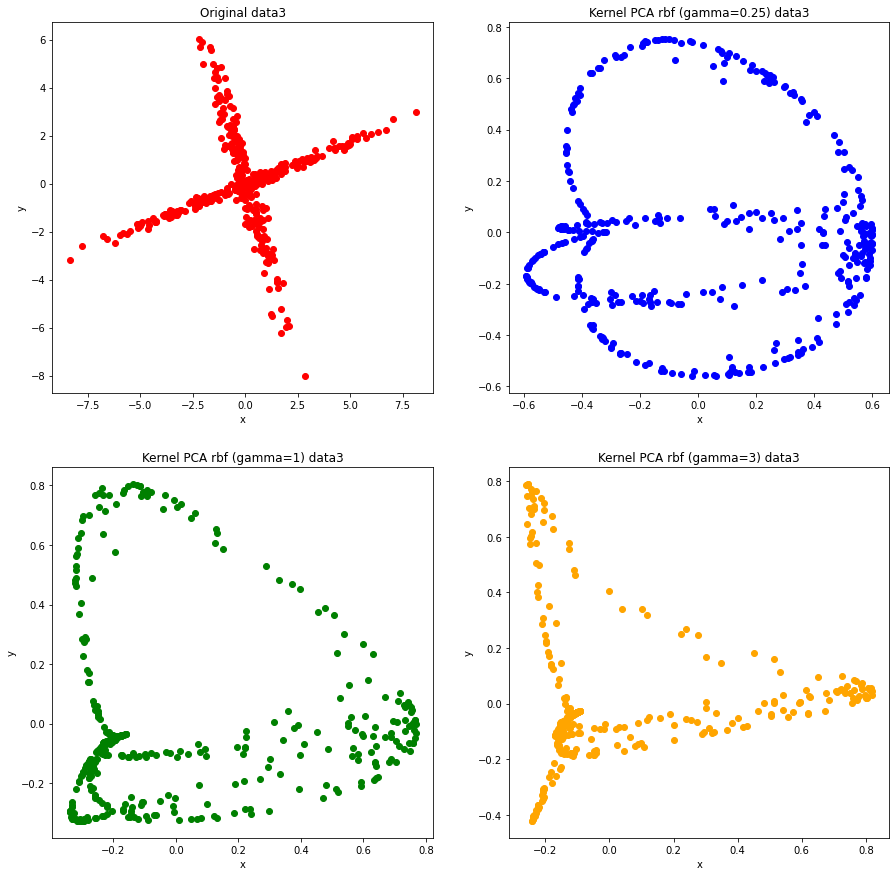

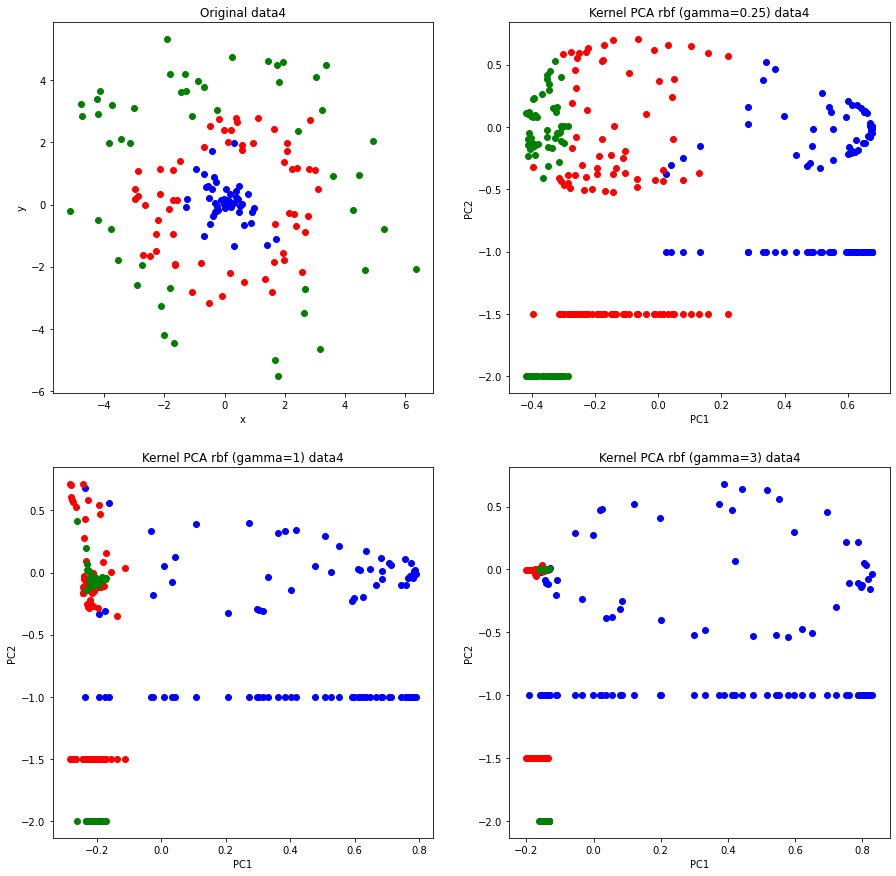

In [61]:
#Kernel PCA using RBF kernel

# Data3
kernel_pca_rfb_0 = KernelPCA(kernel='rbf', gamma=0.25)
data_3_kernel_rfb_0 = kernel_pca_rfb_0.fit_transform(data3)

kernel_pca_rfb_1 = KernelPCA(kernel='rbf', gamma=1)
data_3_kernel_rfb_1 = kernel_pca_rfb_1.fit_transform(data3)

kernel_pca_rfb_3 = KernelPCA(kernel='rbf', gamma=3)
data_3_kernel_rfb_3 = kernel_pca_rfb_3.fit_transform(data3)


fig2 = plt.figure(figsize=(15, 15))
# Original Data3 visualisation
plt.subplot(221)
plt.scatter(data3[:, 0], data3[:, 1], c='red')
plt.title('Original data3')
plt.xlabel('x')
plt.ylabel('y')

# Data3 after Kernel PCA rfb (gamma 0.25) visualisation
plt.subplot(222)
plt.scatter(data_3_kernel_rfb_0[:, 0], data_3_kernel_rfb_0[:, 1], c='blue')
plt.title('Kernel PCA rbf (gamma=0.25) data3')
plt.xlabel('x')
plt.ylabel('y')


# Data3 after Kernel PCA rfb (gamma 1) visualisation
plt.subplot(223)
plt.scatter(data_3_kernel_rfb_1[:, 0], data_3_kernel_rfb_1[:, 1], c='green')
plt.title('Kernel PCA rbf (gamma=1) data3')
plt.xlabel('x')
plt.ylabel('y')


# Data3 after Kernel PCA rfb (gamma 3) visualisation
plt.subplot(224)
plt.scatter(data_3_kernel_rfb_3[:, 0], data_3_kernel_rfb_3[:, 1], c='orange')
plt.title('Kernel PCA rbf (gamma=3) data3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Data4
kernel_pca_2_rbf_0 = KernelPCA(kernel='rbf', gamma=0.25)
data_4_kernel_rbf_0 = kernel_pca_2_rbf_0.fit_transform(data4[:,0:2])

kernel_pca_2_rbf_1 = KernelPCA(kernel='rbf', gamma=1)
data_4_kernel_rbf_1 = kernel_pca_2_rbf_1.fit_transform(data4[:,0:2])

kernel_pca_2_rbf_3 = KernelPCA(kernel='rbf', gamma=3)
data_4_kernel_rbf_3 = kernel_pca_2_rbf_3.fit_transform(data4[:,0:2])


fig3 = plt.figure(figsize=(15, 15))
# Original Data4 visualisation
plt.subplot(221)
for c, i in enumerate(np.unique(data4[:,2])):
    x = data4[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])
plt.title('Original data4')
plt.xlabel('x')
plt.ylabel('y')


# Data4 after Kernel PCA (gamma 2, degree 3) visualisation
plt.subplot(222)
for c, i in enumerate(np.unique(data4[:,2])):
    x = data_4_kernel_rbf_0[data4[:,2] == i]
    x_2 = data_4_kernel_rbf_0[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])
    plt.scatter(x[:,0], np.repeat(-0.5 - (i * 0.5), len(x_2)), color= color[c])
plt.title('Kernel PCA rbf (gamma=0.25) data4')
plt.xlabel('PC1')
plt.ylabel('PC2')


# Data4 after Kernel PCA (gamma 10, degree 35) visualisation
plt.subplot(223)
for c, i in enumerate(np.unique(data4[:,2])):
    x = data_4_kernel_rbf_1[data4[:,2] == i]
    x_2 = data_4_kernel_rbf_0[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])
    plt.scatter(x[:,0], np.repeat(-0.5 - (i * 0.5), len(x_2)), color= color[c])
plt.title('Kernel PCA rbf (gamma=1) data4')
plt.xlabel('PC1')
plt.ylabel('PC2')


# Data4 after Kernel PCA (gamma 2, degree 7) visualisation
plt.subplot(224)
for c, i in enumerate(np.unique(data4[:,2])):
    x = data_4_kernel_rbf_3[data4[:,2] == i]
    x_2 = data_4_kernel_rbf_0[data4[:,2] == i]
    plt.scatter(x[:, 0], x[:, 1], color= color[c])
    plt.scatter(x[:,0], np.repeat(-0.5 - (i * 0.5), len(x_2)), color= color[c])
plt.title('Kernel PCA rbf (gamma=3) data4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


########## YOUR SOLUTION HERE ##########

The way KernelPCA or PCA behaves depends strongly on the original data.
In this case for data3, the kernel PCA (both polynomial and rbf) works worse. In this case is the original data linearly separable, and perform "normal" PCA bring better result in datasets that are linearly separable. In the case of rbf kernel, is even contraproductiv to use it, not only doesn't work better than PCA but make the data worse understandable.
For data4 instead Kernel PCA works better than normal PCA. In this case is the original data not linearly separable, therefore using kernel PCA we can do the data separable and with normal PCA is that not possible. The rbf kernel works better in this case than the polynomial kernel. We observe too than with both polynomial and rbf kernel we only need the first principal component to separate the data correctly.